# TP 2 Descente du Gradient
Dans ce TP, nous aimerions prédire le bénéfice d'une entreprise dans plusieurs ville en nous basant sur les habitant de cette ville.

Pour ce faire, nous étudierons un ensemble de données avec le bénéfice (y) et les caractéristiques des habitants (X).

La prédiction se fera avec l'agorithme de descente du gradient.

# Importation des librairies necessaires au travail

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
import warnings
import time
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings("ignore", category=DataConversionWarning)

# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [145]:
# données
data = np.genfromtxt('data.csv', delimiter=',')
data.shape
pd.DataFrame(data).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       97 non-null     float64
 1   1       97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


Dans ces données (data), la première colonne represente la première caractéristique (la population d'une ville x1000), la deuxieme colonne represente le bénéfice (x1000).

Chaque ligne represente un exemple de notre ensemble de données. 

Mettons ces données dans leus vecteurs correspondants.

In [146]:
# rajoutons l'ordonnée à l'origine theta 0
intercept=np.ones((data.shape[0],1))
X=np.column_stack((intercept,data[:,0]))
print (X.shape)
y = data[:, 1]
y = np.reshape(y, (97,1))

(97, 2)


Text(0, 0.5, 'Bénéfice x1000')

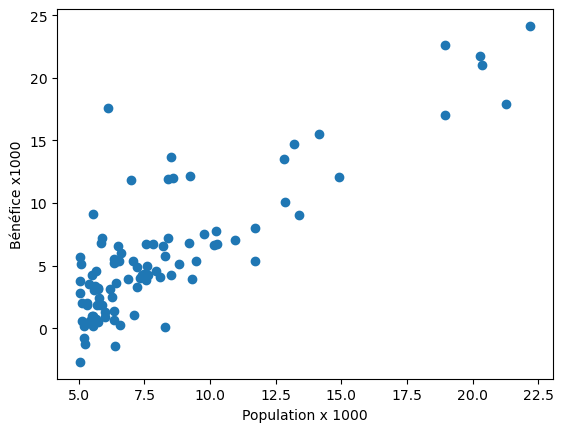

In [147]:
# traçons ces données pour visualisation
plt.scatter(X[:,1],y,marker ='o')
plt.xlabel('Population x 1000')
plt.ylabel('Bénéfice x1000')

# Descente du Gradient : Préparation des fonctions

#### 1- Calcul du coût

Cette fonction servira à calculer le cout $J(\theta_0,\theta_1)$ :


$$
    J(\theta_0, \theta_1) = \frac{1}{2n} \sum_{i=1}^{n} (h_\theta(x_i) - y_i)^2
$$

avec $h_\theta(x_i)$ :

$$
    h_\theta(x_i) =  \theta_0 + \theta_1 * X 
$$

Elle prendra l'ensemble de données d'apprentissage en entrée ainsi que les paramètres définis initialement

- calcul coût sans vectorisation (de manière itérative)

In [148]:
# calcul cout sans  
def computeCostNonVect(X, y, theta):
    n = X.shape[0]
    h = np.zeros(n)
    j = 0
    for i in range(n):
        h[i] = theta[0] + theta[1]*X[i,1]
        j += (h[i] - y[i])**2
    return j / (2*n)
    # comparer le temps de traitement

- calcul coût avec vectorisation

In [149]:
def computeCost(X, y, theta):
    n = X.shape[0]
    h = np.dot(X, theta)
    return np.average((h - y)**2) / 2
    # return np.sum((h - y)**2) /(2*n)

- procedure qui permet de tracer la courbe de la _fonction coût_

In [150]:
def plot_cost_function(cost_history, iterations):
    plt.plot(np.arange(iterations), cost_history, 'r', 5)
    plt.xlabel('iterations')
    plt.ylabel('cost function')
    # comparer le temps de traitement

#### 2- Fonction de la descente du gradient

Cette fonction mettra à jour les paramètres $\theta_0,\theta_1$ jusqu'à convergence: atteinte du nombre d'itérations max, ou dérivée assez petite.

- Équation de calcule de la derivée partiel par rapport a $\theta_j$ :

$$
    \frac{\partial}{\partial \theta_j} J(\theta_0, \theta_1) = \frac{\partial}{\partial \theta_j} \frac{1}{2n} \sum_{i=1}^{n} (h_\theta(x_i) - y_i)^2
$$

- Mise à jour $\theta_0$ :

$$
    \theta_0 = \theta_0 - \alpha\frac{1}{n} \sum_{i=1}^{n} (h_\theta(x_i) - y_i)
$$

- Mise à jour $\theta_1$ :

$$
    \theta_1 = \theta_1 - \alpha\frac{1}{n} \sum_{i=1}^{n} (h_\theta(x_i) - y_i)x_i
$$

In [151]:
#                            ##### ITERATIVE WAY ##### 
def gradientDescentNonVect(X, y, theta, alpha, iterations):
    
    n = X.shape[0] 
    costs = np.zeros(iterations)

      

    for i in range(iterations):
        somme = 0
        somme1 = 0
        for j in range(n):
            h = theta[0] + theta[1]*X[j,1]
            somme += h - y[j]
            somme1 += (h - y[j]) * X[j,1]

        theta[0] = theta[0] - alpha* somme / n
        theta[1] = theta[1] - alpha* somme1 / n

        cost = computeCostNonVect(X,y,theta)
        # print("costNonVect : %s" % cost)
        costs[i] = cost

    plot_cost_function(cost_history=costs, iterations=iterations)

    return theta, costs


#                            ##### DIRECT WAY ##### 
def gradientDescent(X, y, theta, alpha, iterations):
    
    n = X.shape[0] 
        
    costs = np.zeros(iterations)
    # theta0_h = np.zeros(iterations)
    # theta1_h = np.zeros(iterations)

    for i in range(iterations):
        
        # calcule du predict
        h = np.dot(X,theta)
        
        # calcule du gradient
        gradient = np.dot(X.T, h - y) / n

        # maj theta        
        theta = theta - alpha * gradient

        # calcule cout
        cost = computeCost(X,y,theta)
        # print("cost : %s" % cost)
        costs[i] = cost
        # theta0_h[i] = theta[0]
        # theta1_h[i] = theta[1]

    plot_cost_function(cost_history=costs, iterations=iterations)

    return theta, costs

def gradientDescentWithoutplot(X, y, theta, alpha, iterations):
    
    n = X.shape[0] 
        
    costs = np.zeros(iterations)
    # theta0_h = np.zeros(iterations)
    # theta1_h = np.zeros(iterations)

    for i in range(iterations):
        
        # calcule du predict
        h = np.dot(X,theta)
        
        # calcule du gradient
        gradient = np.dot(X.T, h - y) / n

        # maj theta        
        theta = theta - alpha * gradient

        # calcule cout
        cost = computeCost(X,y,theta)
        # print("cost : %s" % cost)
        costs[i] = cost
        # theta0_h[i] = theta[0]
        # theta1_h[i] = theta[1]

    

    return theta, costs


# Descente du Gradient : Appel des fonctions

Initialisation de $\theta_0$ et $\theta_1$

In [152]:
theta = np.zeros((2,1))
print(theta)

[[0.]
 [0.]]


Calculer le cout initial

In [153]:
initialCost=computeCostNonVect(X, y, theta)
print(initialCost)
initialCost1=computeCost(X, y, theta)
print(initialCost1)

[32.07273388]
32.072733877455676


Appel des la fonction de calcul du gradient

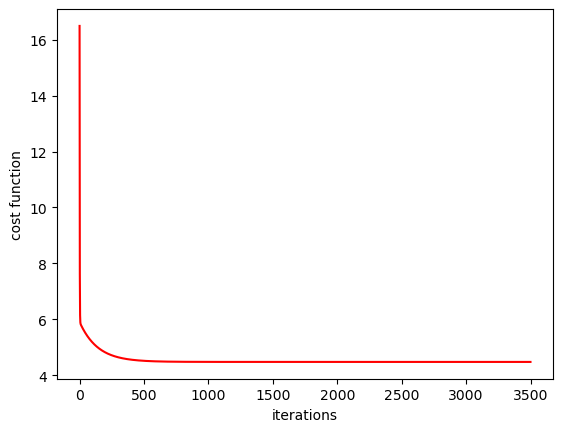

In [155]:
theta = np.zeros((2, 1))
# paramètres
iterations = 3500 # nombre itérations apprentissage --- a changer
alpha = 0.0199 # taux d'apprentissage --- a changer
# Appel
theta, costs = gradientDescent(X, y, theta, alpha, iterations)
# theta2, costs2 = gradientDescentNonVect(X, y, theta, alpha, iterations)

Traçage de la fonction du coût

Notons que $\theta^T  x$ est équivalent à $X  \theta $ où $X= \begin{pmatrix}
..(x^{(1)})^T..\\
..(x^{(2)})^T..\\
.\\
.\\
.\\
..(x^{(m)})^T..
\end{pmatrix} $

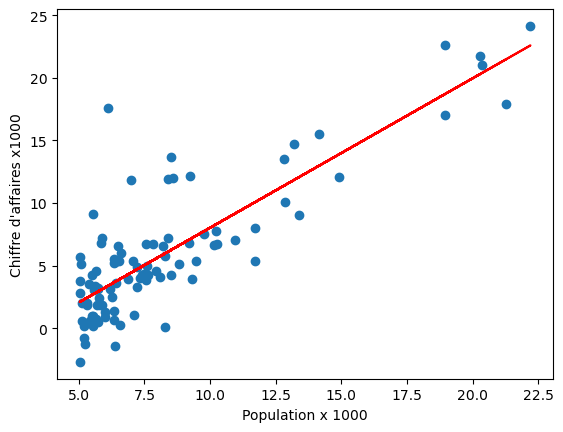

In [156]:
y_pred=np.matmul(X,theta)
plt.scatter(X[:,1],y,marker ='o')
plt.xlabel('Population x 1000')
plt.ylabel('Chiffre d\'affaires x1000')
plt.plot(X[:,1],y_pred, 'r-')
plt.show()
# la ligne du graphe represente le traçage de la fonction hypothèse
# la ligne devrait se rapprocher des données après entrainement avec la descente du gredient

Traçage du coût en fonction de theta0 et theta1

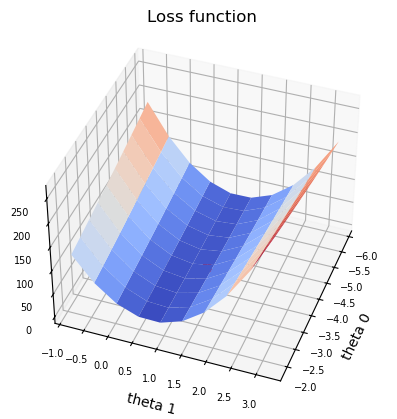

In [157]:

#     # fig = plt.figure(figsize=(16,10))
#     #Plot configuration
#     # ax = fig.add_subplot(111, projection='3d')
    
#     fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    
#     ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
#     ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
#     ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
#     ax.zaxis.set_rotate_label(False)
#     ax.view_init(20, 100)

#     #Useful linearspaces to give values to the parameters w and b
#     # theta0 = np.linspace(0, 1, 100)
#     theta0 = theta0_h
#     # theta1 = np.linspace(0, 1, 100)
#     theta1 = theta1_h

#     #Meshgrid used for plotting 3D functions
#     T0, T1 = np.meshgrid(theta0, theta1)

#     costs = np.reshape(costs, (costs.shape[0], 1))


#     #Create the 3D surface plot of the bowl-shaped cost function
#     ax.plot_surface(T0, T1, costs, cmap = "Spectral_r", alpha=0.7, antialiased=False)
#     ax.plot_wireframe(T0, T1, costs, color='k', alpha=0.1)
    
#     ax.set_xlabel("$\\theta_0$")
#     ax.set_ylabel("$\\theta_1$")
#     ax.set_zlabel("$J(\\theta_0, \\theta_1)$", rotation=90,)
#     ax.set_title("$J(Theta0,Theta1)$\n Fonction cout", size=15)
#     plt.show()


from mpl_toolkits.mplot3d import Axes3D
# Figure and plot - 3D projection
def plot_cost_function_2(costs):

    t1 = np.linspace(theta[0][0]+2,theta[0][0]-2,10)
    t2 = np.linspace(theta[1][0]+2,theta[1][0]-2,10)

    t1, t2 = np.meshgrid(t1, t2)

    c = np.zeros(t1.shape)

    for i in range(t1.shape[0]):
        for j in range(t2.shape[1]):
            c[i][j] = computeCost(X,y,np.array([t1[i][j],t2[i][j]]))

    # Plotting
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(40, 20)

    # Plot surface
    ax.scatter(theta[0],theta[1],costs,marker='x',c='r')
    surf = ax.plot_surface(t1, t2, c,cmap='coolwarm')

    # Add labels
    ax.set_xlabel('theta 0')
    ax.set_ylabel('theta 1')
    ax.set_zlabel('Costs')
    ax.set_title('Loss function')
    plt.tick_params(axis='both', which='major', labelsize=7)

    plt.show()
plot_cost_function_2(costs)

Prédire des valeurs de y

In [158]:
# Predire pour une population = 35,000 et 70,000
predict1 = np.matmul([1, 3.5],theta)
predict1

array([0.27984576])

In [159]:
predict2 = np.matmul([1, 7],theta)
predict2

array([4.4554587])

# Régression linéaire à plusieurs variables

Proposer, l'aide des fonctions définies precedemment, une regression linéaire lorsque le nombre de descripeurs est supérieur à 1, en utilisant la base d'apprentissage suivante

In [160]:
# données
dataMulti = np.genfromtxt('dataMulti.csv', delimiter=',')
dataMulti.shape
pd.DataFrame(dataMulti).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       47 non-null     float64
 1   1       47 non-null     float64
 2   2       47 non-null     float64
dtypes: float64(3)
memory usage: 1.2 KB


Pour cette ensemble de données, nous voudrions prédire le prix d'une maison (3ème colonne de dataMulti) à partir de :
- sa supérficie (1ère colonne)
- son nombre de chambres (2ème colonne)

In [161]:
# d'abord créer X et y
X_multi= dataMulti[:,:2]
print ('X shapes: '+ str(X_multi.shape))
y_multi = dataMulti[:, 2]
# y_multi = np.reshape(y_multi, (y_multi.shape[0],1))
print ('Y shapes: '+ str(y_multi.shape))

X shapes: (47, 2)
Y shapes: (47,)


- Fonction cout pour le cas multivariée

Cette fonction servira à calculer le cout $J(\theta_0,\theta_1)$ :


$$
    J(\theta) = J(\theta_0, \theta_1,...,\theta_m) = \frac{1}{2n} \sum_{i=1}^{n} (h_\theta(x_i) - y_i)^2
$$

avec $h_\theta(x_i)$ :

$$
    h_\theta(x_i) =  \theta_0 * x_0 + \theta_1 * x_1 + \theta_2 * x_2 ... \theta_m * x_m = \theta^T X 
$$

$$
X= \begin{pmatrix}
x_{1}\\
x_{2}\\
...\\
x^{m}
\end{pmatrix}

\theta= \begin{pmatrix}
\theta_{1}\\
\theta_{2}\\
...\\
\theta^{m}
\end{pmatrix}

$$

Elle prendra l'ensemble de données d'apprentissage en entrée ainsi que les paramètres définis initialement

- calcul coût sans vectorisation (de manière itérative)

In [162]:
# redéfinissez vos fonctions de coût si cela est necessaire
def computeCostNonVectMulti(X, y, theta):
    n = X.shape[0]
    h = np.zeros(n)
    j = 0
    for i in range(n):
        h[i] = np.sum(theta[j] * X[i,j] for j in range(X.shape[1]))
        j += (h[i] - y[i])**2
    return j / (2*n)

Mise à l'échelle des données

In [2]:
def to_scale(x):
    maxs = np.max(x, axis = 0)
    scaled_x = x / maxs
    return scaled_x

Normalisation des données en moyenne = 0

In [164]:
def normalize_data(x):
    maxs = np.max(x, axis = 0)
    mins = np.min(x, axis = 0)
    means = np.mean(x, axis = 0)
    normalized_x = (x - means) / (maxs-mins)
    return normalized_x

- Calcul cout initial

In [165]:
start_time_impl_multi= time.time()
theta_multi = np.zeros((X_multi.shape[1],1))
initialCostNonVectMulti = computeCostNonVectMulti(X_multi,y_multi, theta_multi)
print(initialCostNonVectMulti)
initialCostMulti = computeCost(X_multi,y_multi, theta_multi)
print(initialCostMulti)
end_time_impl_multi= time.time()

65591585744.680855
65591585744.680855


- Appliquer la descente du gradient à plusieurs variables

[6.50677075e+10 6.45486595e+10 6.40343974e+10 ... 8.77382051e+09
 8.77382050e+09 8.77382048e+09]


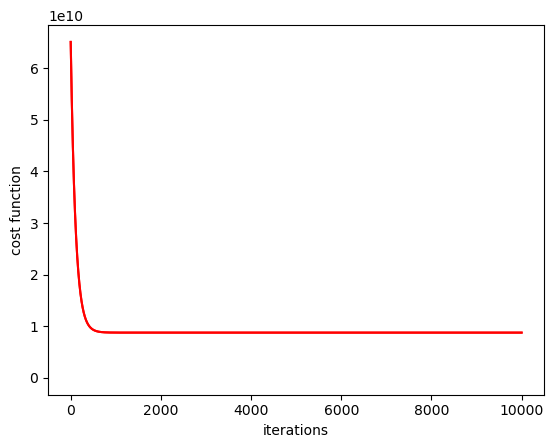

In [167]:
iterations = 10000
alpha = 0.000000001
# alpha = 0.0000000455

intercept_multi = np.ones((X_multi.shape[0],1)) 
x_not_normalized = np.column_stack((intercept_multi, X_multi))


theta = np.zeros((3,1))
theta, costs = gradientDescent(x_not_normalized, y_multi, theta, alpha, iterations)
print(costs)
plot_cost_function(costs, iterations)

Apres Normalisation

[6.42863132e+10 6.30070156e+10 6.17531759e+10 ... 5.49403149e-03
 5.38470026e-03 5.27754473e-03]


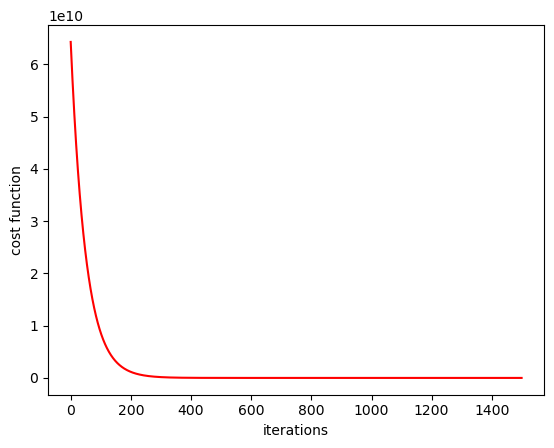

In [169]:
iterations = 1500
alpha = 0.01

x_normalized = to_normalize(X_multi)
x_normalized = np.column_stack((intercept_multi, x_normalized))
y_normalized = to_normalize(y_multi)

theta = np.zeros((3, 1))


theta, cost_history = gradientDescent(x_normalized, y_multi, theta,  alpha, iterations)
print(cost_history)

Comparer la descente du gradient avec et sans normalisation
- **Exemple**: voir la difference dans le temps de calcul

In [3]:



# this function will be used to test the gradient descent on X_multi then X_Normalised 
# this function calculates the time of execution
def test_gradient_descent(X, y, theta, alpha, iterations):
    start_time = time.time()
    theta, costs, theta0_h, theta1_h = gradientDescentWithoutplot(X, y, theta, alpha, iterations)
    end_time = time.time()
    execution_time = end_time - start_time
    return costs, execution_time


#normalised dataset
X_echelle = to_scale(X_multi)
X_normalized = normalize_data(X_echelle)
y_echelle = to_scale(y_multi)
y_normalized = normalize_data(y_echelle)

# iterations and alpha 
iterations_values = [500, 2500, 5000]
alpha_values = [0.1, 0.00001, 0.0000001, 0.000000001]


# two lists to store the lists of execution  for (X_multi and X_normalised) 
# for each iterations (and each  list contains time for each alpha ) 
execution_times_multi = []
execution_times_normalized = []


# for each iteration 
for iterations in iterations_values:
    #CAS1
    #the list for iteration containing times for each alpha (with X_multi) 
    execution_times_multi_alpha = []
    
    #loop all alphas 
    for alpha in alpha_values:
        costs, execution_time = test_gradient_descent(X_multi, y_multi, theta, alpha, iterations)
        execution_times_multi_alpha.append(execution_time)
        
    #add results 
    execution_times_multi.append(execution_times_multi_alpha)
    
    ########################################################################
    #CAS2
    #the list for iteration containing times for each alpha (with X_Normalised)
    execution_times_normalized_alpha = []
    
    #loop all alphas
    for alpha in alpha_values:
        costs_normalized, execution_time_normalized = test_gradient_descent(X_normalized, y_multi, theta, alpha, iterations)
        execution_times_normalized_alpha.append(execution_time_normalized)
        
    #add results 
    execution_times_normalized.append(execution_times_normalized_alpha)

# Plotting 
#parameters 

#Border color grey 
border_color = 'grey'

#width border 
border_width = 0.5

#bar width 
bar_width = 0.20

#index of ploting 
index = np.arange(len(alpha_values))

#for each iteration we display a bar figure 
for i, iterations in enumerate(iterations_values):
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.bar(index - bar_width/2, execution_times_multi[i], bar_width, color='#809bce', edgecolor=border_color, linewidth=border_width, label='X_multi')
    ax.bar(index + bar_width/2, execution_times_normalized[i], bar_width, color='#e8dff5', edgecolor=border_color, linewidth=border_width, label='X_normalized')
    ax.set_xlabel('Alpha')
    ax.set_ylabel('Execution Time (s)')
    ax.set_title(f'Execution times for {iterations} iterations')
    ax.set_xticks(index)
    ax.set_xticklabels(alpha_values)
    ax.set_yscale('log')
    ax.legend()
    plt.show()

NameError: name 'X_multi' is not defined

# Vérification de l'implementation
Comparer vos algorithmes à ceux de scikitlearn

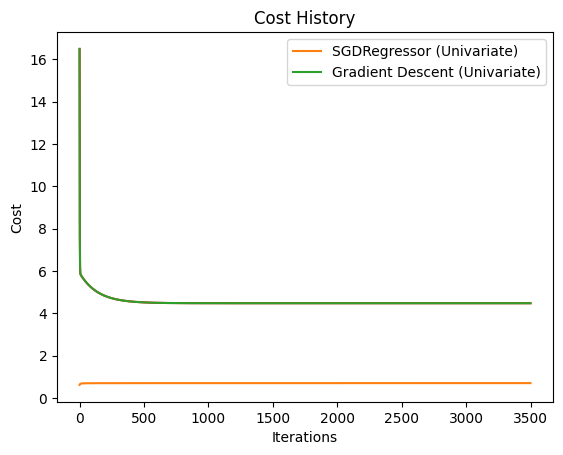

Initial Cost (Using sklearn): 2043280477.3925703, while the result we get using the implemented functions is 65591585744.680855


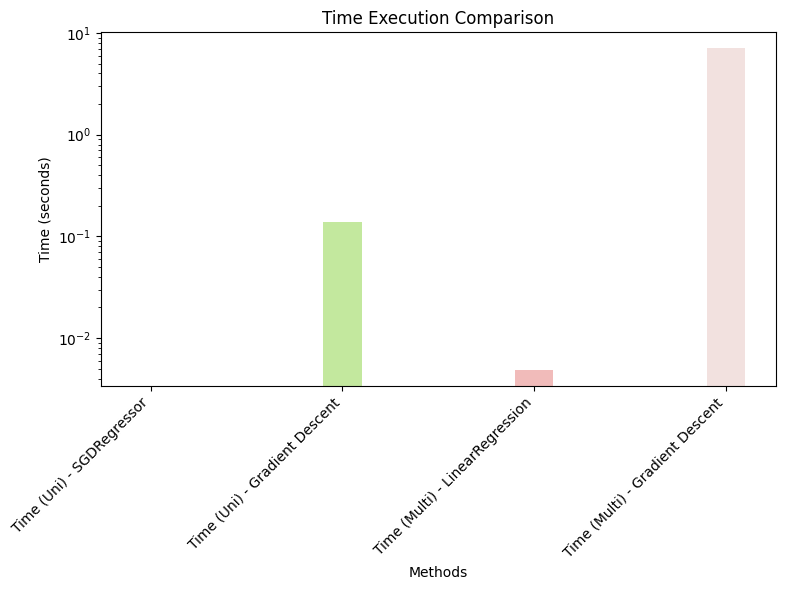

In [177]:
#for univariante 
# Create an instance of the SGDRegressor model for univariate
model_uni = SGDRegressor(loss='squared_error', alpha=0.0199, max_iter=3500, random_state=42)

# Train the model and record the history of costs for univariate

start_time_sklearn_uni = time.time()
cost_history_uni = []
for _ in range(3500):  
    model_uni.partial_fit(X, y)
    cost_uni = model_uni.score(X, y)
    cost_history_uni.append(cost_uni)
end_time_sklearn_uni = time.time()

sgdtimerun=end_time_sklearn_uni-start_time_sklearn_uni

# Run gradient descent for univariate( the one we implemented )
start_time_impl_uni= time.time()
theta_uni = np.zeros((2, 1))
alpha_uni = 0.0199
iterations_uni = 3500
theta_uni, costs_uni, theta0_h_uni, theta1_h_uni = gradientDescent(X, y, theta_uni, alpha_uni, iterations_uni)
end_time_impl_uni= time.time()

gdtimerununi=end_time_impl_uni-start_time_impl_uni

# Plot both results to see the differences
plt.plot(cost_history_uni, label='SGDRegressor (Univariate)')
plt.plot(costs_uni, label='Gradient Descent (Univariate)')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost History')
plt.legend()
plt.show()


#for multivariante
# Create an instance of the LinearRegression model
model = LinearRegression()

start_time_sklearn_multi = time.time()
# Fit the model to the data
model.fit(X_multi, y_multi)

# Get the coefficients (theta)
intercept_array = np.full_like(model.coef_, model.intercept_)
theta_multi = np.hstack((intercept_array.reshape(-1, 1), model.coef_.reshape(-1, 1)))

# Calculate the initial cost using the predicted values
initial_cost_multi = np.mean((model.predict(X_multi) - y_multi) ** 2) / 2
end_time_sklearn_multi = time.time()

rgtimerun=end_time_sklearn_multi-start_time_sklearn_multi

gdtimerunmulti=end_time_impl_multi-start_time_impl_multi

GREEN = '\033[92m'
BOLD = '\033[1m'
END = '\033[0m'
print(f"{BOLD}{GREEN}Initial Cost (Using sklearn):{END} \033[1m{initial_cost_multi}\033[0m, while the result we get using the implemented functions is \033[1m{initialCostMulti}\033[0m")


import matplotlib.pyplot as plt

labels = ['Time (Uni) - SGDRegressor', 'Time (Uni) - Gradient Descent', 'Time (Multi) - LinearRegression', 'Time (Multi) - Gradient Descent']
times = [rgtimerun, gdtimerununi, gdtimerunmulti, sgdtimerun]

# Define pastel colors
pastel_colors = ['#d8d8ea', '#c3e89e', '#f1bbba', '#f2e1df']

# Create the bar plot with pastel colors and adjusted bar width
plt.figure(figsize=(8, 6))
plt.bar(labels, times, color=pastel_colors, width=0.2)
plt.xlabel('Methods')
plt.ylabel('Time (seconds)')
plt.title('Time Execution Comparison')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.yscale('log')
plt.show()


# Renforcement d'apprentissage
Mettre ici toute idée qui pourrait renforcer votre apprentissage

- Enrichir le dataset avec d'autres exemples.
- Ajouter autres features.
- Filtrage des features. 

# Batch GD vs Stochastic GD

- The main problem with Batch Gradient Descent is the fact that it uses the whole
training set to compute the gradients at every step, which makes it very slow when
the training set is large. 
- At the opposite extreme, Stochastic Gradient Descent just
picks a random instance in the training set at every step and computes the gradients
based only on that single instance. Obviously this makes the algorithm much faster
since it has very little data to manipulate